In [36]:
from os import listdir
import numpy as np
import tensorflow as tf
import cv2
import tflite_runtime.interpreter as tflite
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, concatenate
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import time

start = time.time()

In [37]:
def loadImages(path):
    imagesList = listdir(path)
    loadedImages = []
    for image in imagesList:
        img = cv2.imread(path + image)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        img = cv2.resize(img, (50,50))
        img = img.flatten()
        loadedImages.append(img)

    return loadedImages

In [38]:
path = "WSN-DS_1/train/Anomaly/"
aimgs1 = loadImages(path)
alabel1 =  np.ones(len(aimgs1))*1

In [39]:
path = "WSN-DS_1/train/Normal/"
nimgs1 = loadImages(path)
nlabel1 =  np.ones(len(nimgs1))*0

In [40]:
imgs1 = aimgs1.copy()
imgs1.extend(nimgs1)

In [41]:
data1 = np.array(imgs1)
data1 = data1.reshape([-1,50,50,1])
labels1 = np.hstack((alabel1,nlabel1))
labels1 =np.uint8(labels1)

In [42]:
X_train_1 = data1/255
x = np.arange(5000).reshape((2,50,50,1))
x = np.where(x > 0, 0, x)
X_train_1 = np.concatenate((X_train_1, x))
print(X_train_1.shape)

(168598, 50, 50, 1)


In [43]:
path = "WSN-DS_2/train/Anomaly/"
aimgs2 = loadImages(path)
alabel2 = np.ones(len(aimgs2))*1

In [44]:
path = "WSN-DS_2/train/Normal/"
nimgs2 = loadImages(path)
nlabel2 =  np.ones(len(nimgs2))*0

In [45]:
imgs2 = aimgs2.copy()
imgs2.extend(nimgs2)

In [46]:
data2 = np.array(imgs2)
data2 = data2.reshape([-1,50,50,1])
labels2 = np.hstack((alabel2,nlabel2))
labels2 =np.uint8(labels2)

In [47]:
X_train_2 = data2/255


In [48]:
y_train = to_categorical(labels2)
num_classes = y_train.shape[1]

In [49]:
model1 = Sequential()

model1.add(Conv2D(32,(5,5), input_shape=(50,50,1), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))
     
model1.add(Conv2D(filters=32, kernel_size=(3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
    
model1.add(Conv2D(filters=64, kernel_size=(3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))
    
model1.add(Conv2D(filters=128, kernel_size=(3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Dropout(0.1))    

model1.add(Flatten())

model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 46, 46, 32)        832       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
activation_12 (Activation)   (None, 21, 21, 32)        0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 10, 10, 32)       

In [50]:
model2 = Sequential()

model2.add(Conv2D(32,(5,5), input_shape=(50,50,1), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))
     
model2.add(Conv2D(filters=32, kernel_size=(3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Conv2D(filters=64, kernel_size=(3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Conv2D(filters=128, kernel_size=(3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Dropout(0.1))

model2.add(Flatten())

model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 46, 46, 32)        832       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 21, 21, 32)        9248      
_________________________________________________________________
activation_15 (Activation)   (None, 21, 21, 32)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 10, 10, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 10, 10, 32)       

In [51]:
model0 = concatenate([model1.output, model2.output])

x = Dense(512, activation='relu')(model0)
x = Dropout(0.4) (x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.4) (x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.4) (x)
output = Dense(num_classes,activation='softmax')(x)


In [52]:
fusion_model = tf.keras.Model(inputs=[model1.input, model2.input], outputs=[output])

rm = tf.keras.optimizers.SGD(lr=0.001, momentum=0.8)
rm2 = RMSprop(lr=0.001, rho=0.9)
rm3 = tf.keras.optimizers.Adagrad(lr=0.01)
rm4 = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

fusion_model.compile(loss='binary_crossentropy', optimizer=rm, metrics=['accuracy'])

In [53]:
history = fusion_model.fit([X_train_1,X_train_2], y_train, epochs=20, batch_size=200, verbose=2, shuffle = True)
fusion_model.save('fusion_light_weight_model.tflite')  

Epoch 1/20
843/843 - 380s - loss: 0.1365 - accuracy: 0.9497
Epoch 2/20
843/843 - 368s - loss: 0.0493 - accuracy: 0.9826
Epoch 3/20
843/843 - 368s - loss: 0.0386 - accuracy: 0.9864
Epoch 4/20
843/843 - 373s - loss: 0.0335 - accuracy: 0.9885
Epoch 5/20
843/843 - 386s - loss: 0.0307 - accuracy: 0.9894
Epoch 6/20
843/843 - 379s - loss: 0.0292 - accuracy: 0.9904
Epoch 7/20
843/843 - 376s - loss: 0.0266 - accuracy: 0.9910
Epoch 8/20
843/843 - 371s - loss: 0.0255 - accuracy: 0.9918
Epoch 9/20
843/843 - 368s - loss: 0.0248 - accuracy: 0.9918
Epoch 10/20
843/843 - 383s - loss: 0.0231 - accuracy: 0.9923
Epoch 11/20
843/843 - 396s - loss: 0.0234 - accuracy: 0.9925
Epoch 12/20
843/843 - 380s - loss: 0.0224 - accuracy: 0.9928
Epoch 13/20
843/843 - 386s - loss: 0.0225 - accuracy: 0.9926
Epoch 14/20
843/843 - 392s - loss: 0.0215 - accuracy: 0.9929
Epoch 15/20
843/843 - 402s - loss: 0.0211 - accuracy: 0.9931
Epoch 16/20
843/843 - 380s - loss: 0.0209 - accuracy: 0.9935
Epoch 17/20
843/843 - 370s - loss

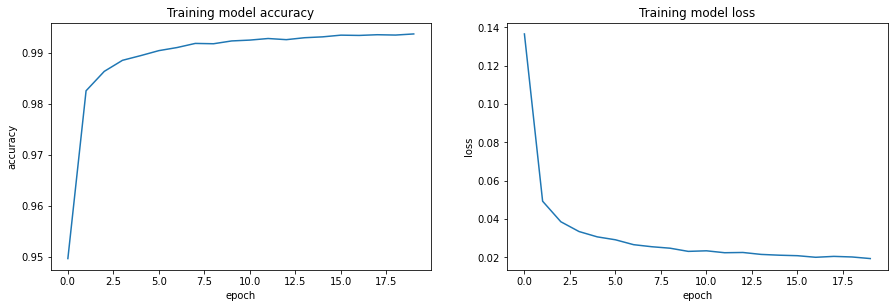

In [57]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure(1, figsize = (15,10)) 
    
plt.subplot(221)  
plt.plot(history.history['accuracy'])   
plt.title('Training model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
    
plt.subplot(222)  
plt.plot(history.history['loss'])  
plt.title('Training model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  

plt.show()

In [55]:
print("Total time: ", time.time() - start, "seconds")

Total time:  7944.412333011627 seconds
